In [4]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame


start = datetime.datetime(2004, 1, 1)
end = datetime.datetime.now()

df = web.DataReader("NTDOY", 'yahoo', start, end)
df.tail(20)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-13,46.200001,45.150002,45.150002,46.060001,544200.0,46.060001
2019-08-14,46.590000,46.000000,46.299999,46.080002,365200.0,46.080002
2019-08-15,47.000000,46.520000,46.830002,46.700001,281100.0,46.700001
2019-08-16,47.090000,46.500000,46.630001,47.049999,157500.0,47.049999
2019-08-19,47.349998,46.919998,46.919998,47.150002,195600.0,47.150002
2019-08-20,47.000000,46.650002,46.830002,46.730000,112800.0,46.730000
2019-08-21,47.619999,47.180000,47.180000,47.490002,352400.0,47.490002
2019-08-22,47.430000,46.730000,47.430000,46.950001,115800.0,46.950001
2019-08-23,47.930000,47.049999,47.840000,47.099998,277200.0,47.099998


In [0]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()

In [6]:
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0
dfreg.head()

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2004-01-02,8.772432,55800.0,1.680671,0.0
2004-01-05,8.772432,88500.0,2.100840,0.0
2004-01-06,8.919868,72300.0,1.652891,0.0
2004-01-07,8.735574,92500.0,0.843885,0.0
2004-01-08,8.661856,82900.0,2.212768,0.0


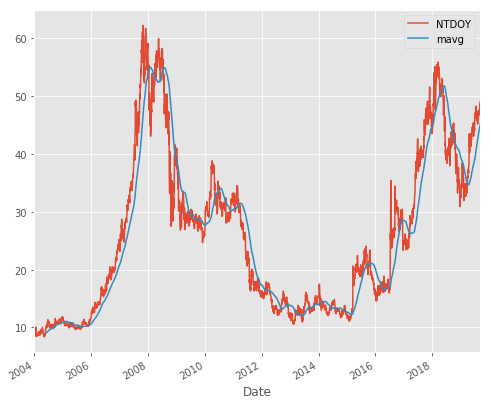

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='NTDOY')
mavg.plot(label='mavg')
plt.legend()

In [0]:
#Machine Learning Testing Model

In [9]:
import math
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import cross_validate, train_test_split


# Drop missing value
dfreg.fillna(value=-99999, inplace=True)

print(dfreg.shape)
# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))

# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))

# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)

# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]

print('Dimension of X',X.shape)
print('Dimension of y',y.shape)

# Separation of training and testing of model by cross validation train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

(3949, 4)
Dimension of X (3909, 4)
Dimension of y (3909,)


In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lars

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [11]:
# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)
# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)

# Orthogonal Matching Pursuit 
clfomp1 = OrthogonalMatchingPursuit(n_nonzero_coefs = 2)
clfomp1.fit(X_train, y_train)

# Elastic-Net
clfenet = ElasticNet(max_iter=250)
clfenet.fit(X_train, y_train)

# Least Angled Regression
clflars = Lars(n_nonzero_coefs=5)
clflars.fit(X_train, y_train)

Lars(copy_X=True, eps=2.220446049250313e-16, fit_intercept=True, fit_path=True,
     n_nonzero_coefs=5, normalize=True, positive=False, precompute='auto',
     verbose=False)

In [12]:
confidencereg = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test,y_test)
confidencepoly3 = clfpoly3.score(X_test,y_test)

# Additional Regression Models
confidenceomp1 = clfomp1.score(X_test, y_test)
confidencenet = clfenet.score(X_test, y_test)
confidencelars = clflars.score(X_test, y_test)

print("The linear regression confidence is ",confidencereg)
print("The quadratic regression 2 confidence is ",confidencepoly2)
print("The quadratic regression 3 confidence is ",confidencepoly3)
print("The omp regression confidence is ",confidenceomp1)
print("The elastic net regression confidence is ",confidencenet)
print("The least angle regression confidence is ",confidencelars)

The linear regression confidence is  0.8992281401052689
The quadratic regression 2 confidence is  0.9014560495638992
The quadratic regression 3 confidence is  0.7837303741444377
The omp regression confidence is  0.8991727473258343
The elastic net regression confidence is  0.7854148845623312
The least angle regression confidence is  0.8992281401052689


In [0]:
def forecast_func(clf) : 

  forecast_set = clf.predict(X_lately)
  dfreg['Forecast'] = np.nan
  last_date = dfreg.iloc[-1].name
  last_unix = last_date
  next_unix = last_unix + datetime.timedelta(days=1)

  for i in forecast_set:
      next_date = next_unix
      next_unix += datetime.timedelta(days=1)
      dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
      
  dfreg['Adj Close'].tail(500).plot()
  dfreg['Forecast'].tail(500).plot()
  plt.legend(loc=4)
  plt.xlabel('Date')
  plt.ylabel('Price')
  plt.show()

The linear regression confidence is  0.8992281401052689


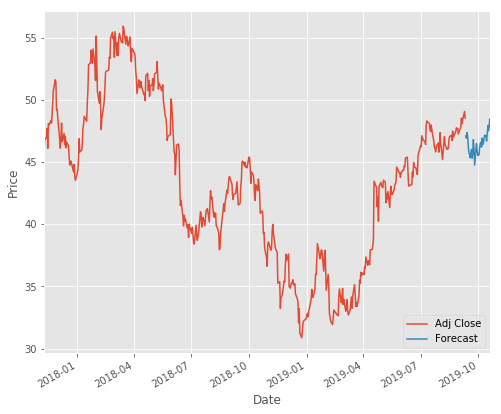

In [14]:
print('The linear regression confidence is ', confidencereg)
forecast_func(clfreg)

The quadratic regression 2 confidence is  0.9014560495638992


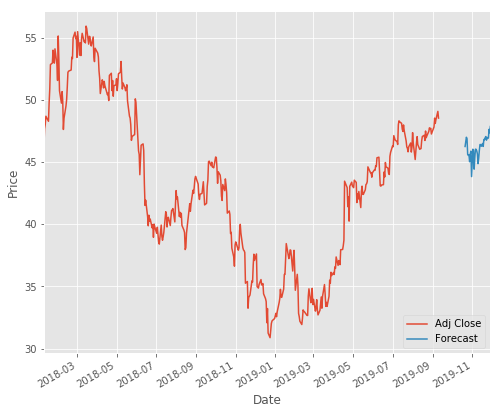

In [15]:
print("The quadratic regression 2 confidence is ",confidencepoly2)
forecast_func(clfpoly2)

The quadratic regression 3 confidence is  0.7837303741444377


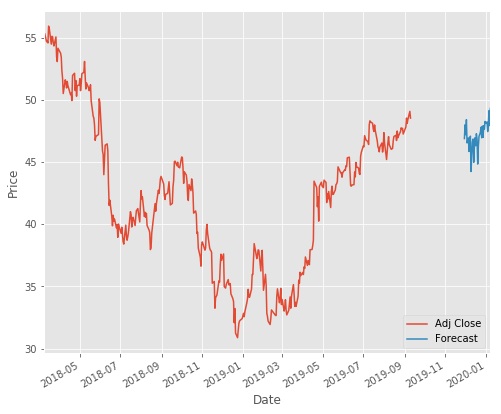

In [16]:
print("The quadratic regression 3 confidence is ",confidencepoly3)
forecast_func(clfpoly3)

The omp regression confidence is  0.8991727473258343


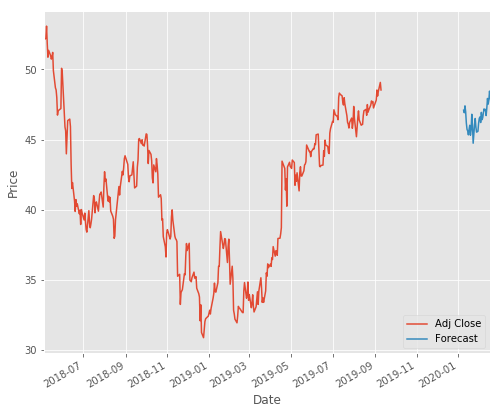

In [17]:
print("The omp regression confidence is ",confidenceomp1)
forecast_func(clfomp1)

The Elastic Net regression confidence is  0.7854148845623312


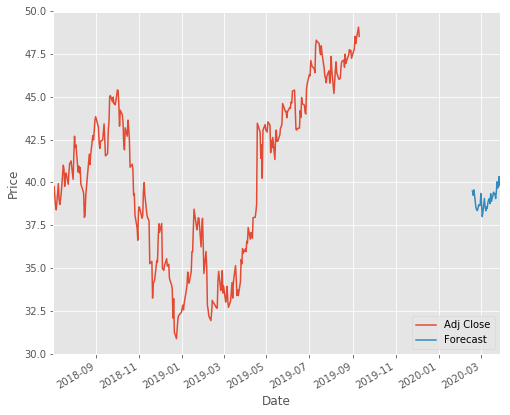

In [18]:
print("The Elastic Net regression confidence is ",confidencenet)
forecast_func(clfenet)

The LARS regression confidence is  0.8992281401052689


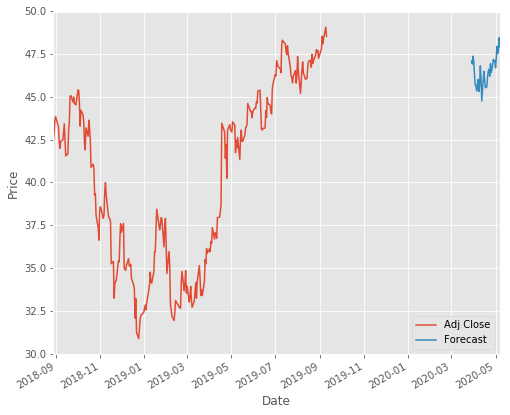

In [19]:
print("The LARS regression confidence is ",confidencelars)
forecast_func(clflars)

Between the six regressions models used to calculate confidence in stocks for Nintendo, the Elastic Net algorithm scored the lowest at ~0.77 confidence score, while, quadratic regression scored the highest at ~0.90. Interestingly enough, linear regression AND least angle regression both scored the same, at ~0.899.

